In [67]:
import nltk
# nltk.download("all")

In [68]:
# Import Libraries
# from nrclex import NRCLex
import inflect
p = inflect.engine()
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [69]:
df = pd.read_csv('./14kfinally.csv', encoding = 'latin1', index_col=0)

In [70]:
df

,text
0,I saw an ad where @aproko_doctor was promoting...
1,I jus watched @aproko_doctor on my tv nowÃ¢ÂÂ...
2,@aproko_doctor I saw u on TV advertising covid...
3,I love this Covid 19 vaccine ad on radio simpl...
4,@aproko_doctor So on point.\nI think you need ...
...,...
6024,Researchers become their own lab rats with DIY...
6025,They've thrown taxpayers money at it but it's ...
6026,Do you still have health insurance? #COVID19 #...
6027,Safe vaccines for #COVID19 doesnÃ¢ÂÂt mean e...


In [71]:
df.info

<bound method DataFrame.info of                                                    text
0     I saw an ad where @aproko_doctor was promoting...
1     I jus watched @aproko_doctor on my tv nowÃ¢ÂÂ...
2     @aproko_doctor I saw u on TV advertising covid...
3     I love this Covid 19 vaccine ad on radio simpl...
4     @aproko_doctor So on point.\nI think you need ...
...                                                 ...
6024  Researchers become their own lab rats with DIY...
6025  They've thrown taxpayers money at it but it's ...
6026  Do you still have health insurance? #COVID19 #...
6027  Safe vaccines for #COVID19 doesnÃ¢ÂÂt mean e...
6028  Do some people have protection against #COVID1...

[14915 rows x 1 columns]>

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14915 entries, 0 to 6028
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    14915 non-null  object
dtypes: object(1)
memory usage: 233.0+ KB


In [73]:
#Create Function to clean Tweets
def cleanTxt(text):
    text = text.lower()
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    # text = re.sub(r'[^A-Za-z0-9\s]+', '', text)
    # text = re.sub('"', '', text)
    return text


In [74]:
df = df.replace('\n',' ', regex=True)


In [75]:
df

,text
0,I saw an ad where @aproko_doctor was promoting...
1,I jus watched @aproko_doctor on my tv nowÃ¢ÂÂ...
2,@aproko_doctor I saw u on TV advertising covid...
3,I love this Covid 19 vaccine ad on radio simpl...
4,@aproko_doctor So on point. I think you need t...
...,...
6024,Researchers become their own lab rats with DIY...
6025,They've thrown taxpayers money at it but it's ...
6026,Do you still have health insurance? #COVID19 #...
6027,Safe vaccines for #COVID19 doesnÃ¢ÂÂt mean e...


In [76]:
df['text'] = df['text'].apply(cleanTxt)

In [77]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [78]:
df

,text
0,i saw an ad where was promoting the covid vac...
1,i jus watched on my tv nowã¢ââ¦ advertising ...
2,"i saw u on tv advertising covid vaccine, i wan..."
3,i love this covid 19 vaccine ad on radio simpl...
4,so on point. i think you need to say this more...
...,...
6024,researchers become their own lab rats with diy...
6025,they've thrown taxpayers money at it but it's ...
6026,do you still have health insurance? covid19 co...
6027,safe vaccines for covid19 doesnã¢âât mean ef...


In [79]:
# df.to_csv("./orimp1.csv")

In [80]:
df = df.drop_duplicates()

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14101 entries, 0 to 6028
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    14101 non-null  object
dtypes: object(1)
memory usage: 220.3+ KB


In [82]:
df.info

<bound method DataFrame.info of                                                    text
0     i saw an ad where  was promoting the covid vac...
1     i jus watched  on my tv nowã¢ââ¦ advertising ...
2     i saw u on tv advertising covid vaccine, i wan...
3     i love this covid 19 vaccine ad on radio simpl...
4     so on point. i think you need to say this more...
...                                                 ...
6024  researchers become their own lab rats with diy...
6025  they've thrown taxpayers money at it but it's ...
6026  do you still have health insurance? covid19 co...
6027  safe vaccines for covid19 doesnã¢âât mean ef...
6028  do some people have protection against covid19...

[14101 rows x 1 columns]>

In [83]:
# #df['text'].astype(bool)

In [84]:
# df[df['text'].astype(bool)] 

In [85]:
# df = df[df['text'].str.strip().astype(bool)]

In [86]:
df

,text
0,i saw an ad where was promoting the covid vac...
1,i jus watched on my tv nowã¢ââ¦ advertising ...
2,"i saw u on tv advertising covid vaccine, i wan..."
3,i love this covid 19 vaccine ad on radio simpl...
4,so on point. i think you need to say this more...
...,...
6024,researchers become their own lab rats with diy...
6025,they've thrown taxpayers money at it but it's ...
6026,do you still have health insurance? covid19 co...
6027,safe vaccines for covid19 doesnã¢âât mean ef...


In [87]:
df

,text
0,i saw an ad where was promoting the covid vac...
1,i jus watched on my tv nowã¢ââ¦ advertising ...
2,"i saw u on tv advertising covid vaccine, i wan..."
3,i love this covid 19 vaccine ad on radio simpl...
4,so on point. i think you need to say this more...
...,...
6024,researchers become their own lab rats with diy...
6025,they've thrown taxpayers money at it but it's ...
6026,do you still have health insurance? covid19 co...
6027,safe vaccines for covid19 doesnã¢âât mean ef...


In [88]:
# n = 177
 
# # Dropping last n rows using drop
# df.drop(df.tail(n).index,
#         inplace = True)

In [89]:
df

,text
0,i saw an ad where was promoting the covid vac...
1,i jus watched on my tv nowã¢ââ¦ advertising ...
2,"i saw u on tv advertising covid vaccine, i wan..."
3,i love this covid 19 vaccine ad on radio simpl...
4,so on point. i think you need to say this more...
...,...
6024,researchers become their own lab rats with diy...
6025,they've thrown taxpayers money at it but it's ...
6026,do you still have health insurance? covid19 co...
6027,safe vaccines for covid19 doesnã¢âât mean ef...


In [90]:
# df.to_csv('./editwhitespace.csv')

In [91]:
#Subjectivity and Polarity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Creating New Columns
df['Subjectivity'] = df['text'].apply(getSubjectivity)
df['Polarity'] = df['text'].apply(getPolarity)

C:\Users\ORIM PRECIOUS\AppData\Local\Temp\ipykernel_10384\1786546078.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ORIM PRECIOUS\AppData\Local\Temp\ipykernel_10384\1786546078.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [92]:
def getAnalysis(score):
    if score > 0:
        return 'Positive' 
    elif score == 0:
        return 'Neutral'
    else:
        return 'Negative' 
        
df['sentiment'] = df['Polarity'].apply(getAnalysis)

C:\Users\ORIM PRECIOUS\AppData\Local\Temp\ipykernel_10384\3827018552.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [93]:
df

,text,Subjectivity,Polarity,sentiment
0,i saw an ad where was promoting the covid vac...,0.500000,0.333333,Positive
1,i jus watched on my tv nowã¢ââ¦ advertising ...,0.000000,0.000000,Neutral
2,"i saw u on tv advertising covid vaccine, i wan...",0.150000,-0.200000,Negative
3,i love this covid 19 vaccine ad on radio simpl...,0.619048,0.366667,Positive
4,so on point. i think you need to say this more...,0.400000,0.100000,Positive
...,...,...,...,...
6024,researchers become their own lab rats with diy...,0.770000,0.380000,Positive
6025,they've thrown taxpayers money at it but it's ...,1.000000,-1.000000,Negative
6026,do you still have health insurance? covid19 co...,0.000000,0.000000,Neutral
6027,safe vaccines for covid19 doesnã¢âât mean ef...,0.662500,0.262500,Positive


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14101 entries, 0 to 6028
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text          14101 non-null  object 
 1   Subjectivity  14101 non-null  float64
 2   Polarity      14101 non-null  float64
 3   sentiment     14101 non-null  object 
dtypes: float64(2), object(2)
memory usage: 550.8+ KB


In [95]:
df.sentiment.unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [96]:
# sentiment_data_list = ['Positive','Negative']
# sentiment_data_list2 = ['Neutral']

In [97]:
# df1 = df[df.sentiment.isin(sentiment_data_list)]
# df2 = df[df.sentiment.isin(sentiment_data_list2)]

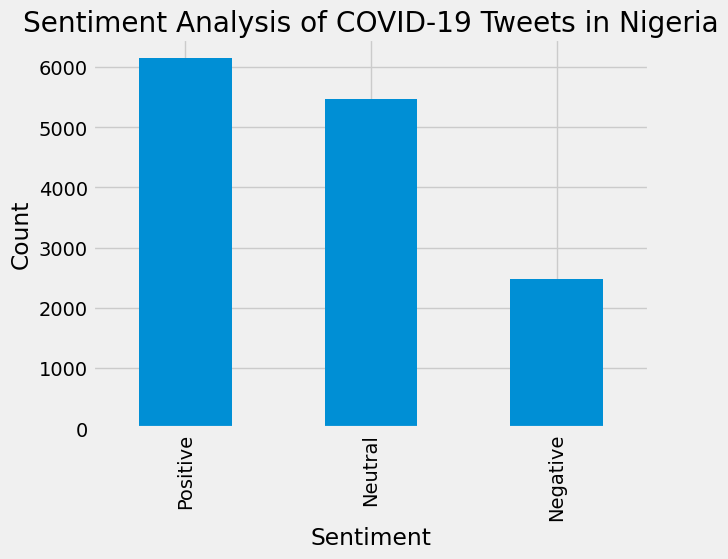

In [98]:
df['sentiment'].value_counts().plot(kind = 'bar')

plt.title('Sentiment Analysis of COVID-19 Tweets in Nigeria')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [99]:
#Plotting WordCloud
# allWords = ' '.join(txts for txts in df['text'])
# wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

# plt.imshow(wordCloud, interpolation = 'bilinear')
# plt.axis('off')
# plt.show()

In [100]:
def stem_lemmatized(text):    
    tokens = word_tokenize(text)
    tokens = [i_token for i_token in tokens if i_token not in stopwords.words("english")]
    stemmed = [PorterStemmer().stem(i_token) for i_token in tokens]
    lemmatized = [WordNetLemmatizer().lemmatize(i_token, pos = 'n') for i_token in stemmed]
    lemmatized = [WordNetLemmatizer().lemmatize(i_token, pos = 'v') for i_token in lemmatized]
    return lemmatized

In [101]:
df['text'] = df['text'].apply(stem_lemmatized)

C:\Users\ORIM PRECIOUS\AppData\Local\Temp\ipykernel_10384\568014863.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [102]:
df['text'] = df['text'].str.join(" ")

C:\Users\ORIM PRECIOUS\AppData\Local\Temp\ipykernel_10384\3055101918.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [103]:
df

,text,Subjectivity,Polarity,sentiment
0,"saw ad promot covid vaccin pregnant woman , et...",0.500000,0.333333,Positive
1,ju watch tv nowã¢ââ¦ advertis covid vaccin ! ...,0.000000,0.000000,Neutral
2,"saw u tv advertis covid vaccin , wan use oppor...",0.150000,-0.200000,Negative
3,love covid 19 vaccin ad radio simpli speak end...,0.619048,0.366667,Positive
4,point . think need say ... least frequent hear...,0.400000,0.100000,Positive
...,...,...,...,...
6024,research becom lab rat diy coronaviru vaccin -...,0.770000,0.380000,Positive
6025,'ve throw taxpay money 's doubt covid19 vaccin...,1.000000,-1.000000,Negative
6026,still health insur ? covid19 coronaviru taxpay...,0.000000,0.000000,Neutral
6027,safe vaccin covid19 doesnã¢âât mean effect v...,0.662500,0.262500,Positive


In [104]:
# #Plot Polarity and Subjetivity
# plt.figure(figsize = (8,6))
# for i in range (0, df.shape[0]):
#     plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')

# plt.title('Sentiment Analysis')
# plt.xlabel('Polarity')
# plt.ylabel('Subjectivity')
# plt.show()

In [105]:
# df['sentiment'].mask(df['sentiment'] == 'Positive', 1, inplace=True)
# df['sentiment'].mask(df['sentiment'] == 'Negative', 0, inplace=True)
# df['sentiment'].mask(df['sentiment'] == 'Neutral', 2, inplace=True)

In [106]:
df

,text,Subjectivity,Polarity,sentiment
0,"saw ad promot covid vaccin pregnant woman , et...",0.500000,0.333333,Positive
1,ju watch tv nowã¢ââ¦ advertis covid vaccin ! ...,0.000000,0.000000,Neutral
2,"saw u tv advertis covid vaccin , wan use oppor...",0.150000,-0.200000,Negative
3,love covid 19 vaccin ad radio simpli speak end...,0.619048,0.366667,Positive
4,point . think need say ... least frequent hear...,0.400000,0.100000,Positive
...,...,...,...,...
6024,research becom lab rat diy coronaviru vaccin -...,0.770000,0.380000,Positive
6025,'ve throw taxpay money 's doubt covid19 vaccin...,1.000000,-1.000000,Negative
6026,still health insur ? covid19 coronaviru taxpay...,0.000000,0.000000,Neutral
6027,safe vaccin covid19 doesnã¢âât mean effect v...,0.662500,0.262500,Positive


In [107]:
# import nlpaug.augmenter.word.context_word_embs as aug

In [108]:
# augumenter = aug.ContextualWordEmbsAug(model_path='bert-base-uncased', action='insert')

In [109]:
sample_text = df['text'].iloc[100]

In [110]:
sample_text

'thank lot . accord statist ( un ) , 10 million nigerian hepat b. current research show cure prevent vaccin . peep say herb cure .'

In [111]:
# augmented_sample_text = augmenter.augment(sample_text)

In [112]:
df

,text,Subjectivity,Polarity,sentiment
0,"saw ad promot covid vaccin pregnant woman , et...",0.500000,0.333333,Positive
1,ju watch tv nowã¢ââ¦ advertis covid vaccin ! ...,0.000000,0.000000,Neutral
2,"saw u tv advertis covid vaccin , wan use oppor...",0.150000,-0.200000,Negative
3,love covid 19 vaccin ad radio simpli speak end...,0.619048,0.366667,Positive
4,point . think need say ... least frequent hear...,0.400000,0.100000,Positive
...,...,...,...,...
6024,research becom lab rat diy coronaviru vaccin -...,0.770000,0.380000,Positive
6025,'ve throw taxpay money 's doubt covid19 vaccin...,1.000000,-1.000000,Negative
6026,still health insur ? covid19 coronaviru taxpay...,0.000000,0.000000,Neutral
6027,safe vaccin covid19 doesnã¢âât mean effect v...,0.662500,0.262500,Positive


In [113]:
df = df.drop(["Subjectivity","Polarity"], axis = "columns")
# df2 = df2.drop(["Subjectivity","Polarity","sentiment"], axis = "columns")

In [114]:
df.sentiment.unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14101 entries, 0 to 6028
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       14101 non-null  object
 1   sentiment  14101 non-null  object
dtypes: object(2)
memory usage: 330.5+ KB


In [116]:
# df.to_csv('./godabeg1.csv')

In [117]:
# /sentiment_data_list = ['1']
# sentiment_data_list2 = ['0']


In [118]:
# sentiment_data_list

In [119]:
# df1 = df[df.sentiment.isin(sentiment_data_list)]
# df2 = df[df.sentiment.isin(sentiment_data_list2)]

In [120]:
# df1

In [121]:
# /df.to_csv('./14kdataset2.csv')
# df2.to_csv('./test.csv')

In [122]:
from nrclex import NRCLex
str_tweet = ','.join(df['text'])
text_object = NRCLex(str_tweet)

In [123]:
data = text_object.raw_emotion_scores

In [124]:
data

{'trust': 8309,
 'fear': 7304,
 'negative': 9923,
 'sadness': 5134,
 'anticipation': 7398,
 'positive': 11047,
 'joy': 4116,
 'anger': 3693,
 'disgust': 2983,
 'surprise': 2561}

In [126]:
del(data['positive'])
del(data['negative'])
del(data['trust'])
# del(data['anticip'])

KeyError: 'positive'

In [ ]:
data

{'fear': 7304,
 'sadness': 5134,
 'anticipation': 7398,
 'joy': 4116,
 'anger': 3693,
 'disgust': 2983,
 'surprise': 2561}

In [ ]:
emotion_df = pd.DataFrame.from_dict(data, orient='index')
emotion_df = emotion_df.reset_index()
emotion_df = emotion_df.rename(columns={'index' : 'Emotion Classification' , 0: 'Emotion Count'})
emotion_df = emotion_df.sort_values(by=['Emotion Count'], ascending=False)
import plotly.express as px
fig = px.bar(emotion_df, x='Emotion Count', y='Emotion Classification', color = 'Emotion Classification', orientation='h', width = 800, height = 400)
fig.show()

In [ ]:
data = text_object.affect_frequencies   

In [ ]:
data

{'fear': 0.11692386501888967,
 'anger': 0.059118268553499394,
 'anticip': 0.0,
 'trust': 0.1330121021963245,
 'surprise': 0.04099699045911507,
 'positive': 0.1768425433822117,
 'negative': 0.158849330857399,
 'sadness': 0.08218607927258756,
 'disgust': 0.04775244925401806,
 'joy': 0.06588973554459883,
 'anticipation': 0.11842863546135621}

In [ ]:
del(data['positive'])
del(data['negative'])
del(data['trust'])
del(data['anticip'])

In [ ]:
data

{'fear': 0.11692386501888967,
 'anger': 0.059118268553499394,
 'trust': 0.1330121021963245,
 'surprise': 0.04099699045911507,
 'sadness': 0.08218607927258756,
 'disgust': 0.04775244925401806,
 'joy': 0.06588973554459883,
 'anticipation': 0.11842863546135621}

In [ ]:
emotion_df = pd.DataFrame.from_dict(data, orient='index')
emotion_df = emotion_df.reset_index()
emotion_df = emotion_df.rename(columns={'index' : 'Emotion Classification' , 0: 'Emotion Count'})
emotion_df = emotion_df.sort_values(by=['Emotion Count'], ascending=False)
import plotly.express as px
fig = px.bar(emotion_df, x='Emotion Count', y='Emotion Classification', color = 'Emotion Classification', orientation='h', width = 800, height = 400)
fig.show()